In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [45]:
#clean and analyze data
df = pd.read_csv('train.csv')
label_encoder = LabelEncoder()

columns_to_label_encode = ['Sex', 'Cabin', 'Embarked', 'Ticket', 'Name'] 

for column in columns_to_label_encode:
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column])

        
average_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(average_age)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

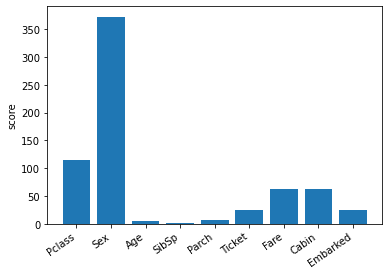

In [46]:
X = df.drop(['Survived', 'PassengerId', 'Name'], axis=1)
y = df['Survived']

bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X,y)
plt.bar(x=X.columns,height=fit.scores_)
plt.ylabel('score')
plt.xticks(rotation=35, ha='right')

In [47]:
#Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

depths = [7]

for depth in depths:
    model = RandomForestClassifier(max_depth=depth)
    model.fit(X_train, y_train)

    accuracy = model.score(X_test, y_test)
    train_accuracy = model.score(X_train, y_train)
    print("Accuracy depth ", depth, ":", accuracy)
    print(f"Test set accuracy: {accuracy}")

Accuracy depth  7 : 0.8100558659217877
Test set accuracy: 0.8100558659217877


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
print(f"Training set accuracy: {train_accuracy}")
print(f"Test set accuracy: {test_accuracy}")

probabilities = knn.predict_proba(X_test)
print("Output Probabilities for the test set:")
print(probabilities)

for p_value in [1, 2, 3, 4, 5]:
    knn = KNeighborsClassifier(p=p_value)
    knn.fit(X_train, y_train)

    train_accuracy = knn.score(X_train, y_train)
    test_accuracy = knn.score(X_test, y_test)
    print(f"\nTraining set accuracy: {train_accuracy}")
    print(f"Test set accuracy: {test_accuracy}")

Training set accuracy: 0.7881219903691814
Test set accuracy: 0.7014925373134329
Output Probabilities for the test set:
[[0.6 0.4]
 [0.6 0.4]
 [0.8 0.2]
 [0.4 0.6]
 [0.4 0.6]
 [0.4 0.6]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.4 0.6]
 [0.4 0.6]
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]
 [0.2 0.8]
 [0.  1. ]
 [0.4 0.6]
 [0.6 0.4]
 [0.8 0.2]
 [0.6 0.4]
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [0.8 0.2]
 [0.4 0.6]
 [0.8 0.2]
 [0.4 0.6]
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]
 [0.8 0.2]
 [0.8 0.2]
 [0.6 0.4]
 [0.6 0.4]
 [0.8 0.2]
 [0.8 0.2]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [0.6 0.4]
 [0.4 0.6]
 [0.8 0.2]
 [0.8 0.2]
 [0.8 0.2]
 [0.8 0.2]
 [1.  0. ]
 [0.6 0.4]
 [0.2 0.8]
 [0.  1. ]
 [1.  0. ]
 [0.4 0.6]
 [0.8 0.2]
 [0.4 0.6]
 [0.8 0.2]
 [0.2 0.8]
 [0.6 0.4]
 [0.6 0.4]
 [0.6 0.4]
 [0.2 0.8]
 [0.4 0.6]
 [0.4 0.6]
 [0.6 0.4]
 [0.8 0.2]
 [0.8 0.2]
 [0.8 0.2]
 [0.8 0.2]
 [0.6 0.4]
 [0.6 0.4]
 [0.4 0.6]
 [0.8 0.2]
 [0.6 0.4]
 [0.6 0.4]
 [1.  0. ]
 [0.8 0.2]
 [0.2 0.8]
 [0.2 0.8]
 [0.8 0.2]
 

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y-1, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

num_classes = len(set(y_train))

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')  # Assuming a binary classification task
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=20)

test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {test_acc}')

AttributeError: module 'keras.src.backend' has no attribute 'floatx'

In [53]:
!python.exe -m pip install --upgrade pip


  Using cached pip-23.3.2-py3-none-any.whl.metadata (3.5 kB)
Using cached pip-23.3.2-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
